In [14]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from IPython.display import Image


In [5]:
#create state first
class GradeState(TypedDict):
    math: int
    science: int
    english: int
    avearage: float
    grade: str


In [6]:
# Node functions

#Node 1: calculate average
def cal_average(state:GradeState)->GradeState:
    state['avearage']=(state['math']+state['science']+state['english'])/3
    return state

#Node 2: assign grade
def assign_grade(state:GradeState)->GradeState:
    if state['avearage']>=90:
        state['grade']='A'
    elif state['avearage']>=80:
        state['grade']='B'
    elif state['avearage']>=70:
        state['grade']='C'
    elif state['avearage']>=60:
        state['grade']='D'
    else:
        state['grade']='F'
    return state

In [8]:
# Lets Build a graph
graph=StateGraph(GradeState)

graph.add_node('cal_average',cal_average)
graph.add_node('assign_grade',assign_grade)

graph.add_edge(START,'cal_average')
graph.add_edge('cal_average','assign_grade')
graph.add_edge('assign_grade',END)


In [9]:
# compile the graph
workflow =graph.compile()

In [12]:
#run the workflow
initial_state={'math':85,'science':90,'english':80,'avearage':0.0,'grade':''}
final_state=workflow.invoke(initial_state)
final_state

{'math': 85, 'science': 90, 'english': 80, 'avearage': 85.0, 'grade': 'B'}

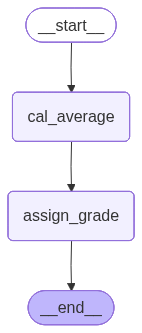

In [15]:
# print the graph
Image(workflow.get_graph().draw_mermaid_png())